<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [4]:
# import libraries

In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import seaborn as sns 

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [3]:
# read data and check how many class in train set

In [4]:
pwd

'C:\\Users\\MT\\Desktop\\2- DL\\Proje_Ödev\\CNN_Proje'

In [5]:
my_data_dir = 'C:\\Users\\MT\\Desktop\\2- DL\\Proje_Ödev\\CNN_Proje\data'

In [6]:
os.listdir(my_data_dir)

['test', 'train', 'validation']

In [7]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'
validation_path = my_data_dir+'/validation/'

In [8]:
os.listdir(train_path)

['cat', 'dog']

In [9]:
os.listdir(validation_path)

['cat', 'dog']

In [10]:
os.listdir(test_path)

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '1007

 ## cat   

In [11]:
os.listdir(train_path+'cat')[100]

'cat.10087.jpg'

In [12]:
cat_img = train_path+'cat'+'/cat.10087.jpg'

In [13]:
imread(cat_img)

array([[[109,  94,  75],
        [115, 100,  81],
        [126, 111,  92],
        ...,
        [ 36,  34,  21],
        [ 36,  34,  21],
        [ 36,  34,  21]],

       [[110,  95,  76],
        [110,  95,  76],
        [115, 100,  81],
        ...,
        [ 35,  33,  21],
        [ 35,  33,  20],
        [ 35,  33,  20]],

       [[114,  99,  80],
        [109,  94,  75],
        [107,  92,  73],
        ...,
        [ 34,  32,  20],
        [ 34,  32,  20],
        [ 34,  32,  20]],

       ...,

       [[176, 141, 111],
        [212, 177, 145],
        [206, 171, 139],
        ...,
        [239, 188, 123],
        [241, 190, 125],
        [237, 186, 121]],

       [[176, 141, 111],
        [212, 177, 145],
        [206, 171, 139],
        ...,
        [239, 188, 123],
        [241, 190, 125],
        [238, 187, 122]],

       [[176, 141, 111],
        [212, 177, 145],
        [206, 171, 139],
        ...,
        [239, 188, 123],
        [241, 190, 125],
        [238, 187, 122]]

In [14]:
cat_img= imread(cat_img)

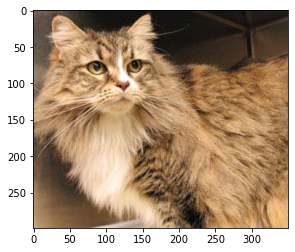

In [15]:
plt.imshow(cat_img)

In [16]:
cat_img.shape

(299, 350, 3)

## dog 

In [17]:
os.listdir(train_path+'dog')[500]

'dog.10295.jpg'

In [18]:
dog_img = train_path+'dog'+'/dog.10295.jpg'

In [19]:
imread(dog_img)

array([[[ 86,  86,  62],
        [ 85,  85,  61],
        [ 85,  85,  61],
        ...,
        [121, 120,  99],
        [119, 121,  99],
        [120, 122, 100]],

       [[ 85,  85,  61],
        [ 84,  84,  60],
        [ 84,  84,  60],
        ...,
        [122, 121, 100],
        [120, 122, 100],
        [121, 123, 101]],

       [[ 88,  88,  64],
        [ 87,  87,  63],
        [ 86,  85,  64],
        ...,
        [124, 123, 102],
        [122, 124, 103],
        [122, 124, 103]],

       ...,

       [[155, 145, 143],
        [156, 146, 144],
        [156, 146, 144],
        ...,
        [ 83,  77,  61],
        [ 82,  76,  60],
        [ 82,  76,  60]],

       [[154, 145, 140],
        [155, 146, 141],
        [155, 145, 143],
        ...,
        [ 77,  74,  57],
        [ 76,  73,  56],
        [ 75,  72,  55]],

       [[151, 144, 138],
        [152, 145, 139],
        [153, 146, 140],
        ...,
        [ 76,  73,  56],
        [ 74,  71,  54],
        [ 73,  70,  53]]

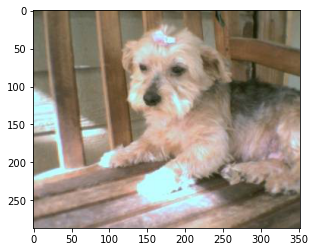

In [20]:
plt.imshow(imread(dog_img))

**Let's check how many images there are.**

In [21]:
len(os.listdir(train_path+'cat'))

12500

In [22]:
len(os.listdir(train_path+'dog'))

5026

In [23]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes


In [24]:
os.listdir(train_path+'cat')[0]

'cat.0.jpg'

In [25]:
cat_0 = train_path+'cat'+'/cat.0.jpg'

In [26]:
cat_0 = imread(cat_0)

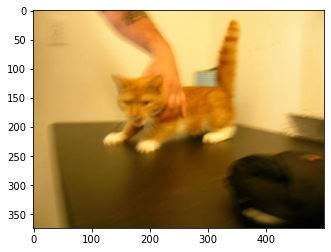

In [27]:
plt.imshow(cat_0)

In [28]:
os.listdir(train_path+'dog')[0]

'2462.jpg'

In [29]:
#train_path+'dog'+'/dog.2462.jpg'

In [30]:
#imread('C:\\Users\\MT\\Desktop\\2- DL\\Proje_Ödev\\CNN_Proje\\data/train/dog/dog.2462.jpg')

In [31]:
#plt.imshow(imread('C:\\Users\\MT\\Desktop\\2- DL\\Proje_Ödev\\CNN_Proje\\data/train/dog/dog.2462.jpg'))

In [32]:
dog_0 = train_path+'dog'+'/dog.2462.jpg'

In [33]:
imread(dog_0)

array([[[220, 205, 198],
        [217, 202, 195],
        [211, 196, 189],
        ...,
        [154, 162, 164],
        [166, 174, 176],
        [164, 172, 174]],

       [[219, 204, 197],
        [216, 201, 194],
        [211, 196, 189],
        ...,
        [156, 162, 162],
        [169, 175, 175],
        [167, 173, 173]],

       [[219, 204, 197],
        [216, 201, 194],
        [211, 196, 189],
        ...,
        [158, 164, 164],
        [171, 177, 177],
        [170, 176, 176]],

       ...,

       [[226, 220, 220],
        [223, 217, 217],
        [220, 214, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[227, 221, 221],
        [224, 218, 218],
        [221, 215, 215],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[228, 222, 222],
        [225, 219, 219],
        [222, 216, 216],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [34]:
dog_0 = imread(dog_0)

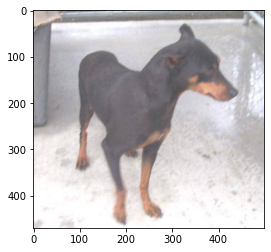

In [35]:
plt.imshow(dog_0)


**Let's decide on the final dimension of these images.**

In [36]:
cat_0.shape

(374, 500, 3)

In [37]:
dog_0.shape

(470, 499, 3)

In [38]:
 x= []
y = []
for image in os.listdir(test_path):
    
    img = imread(test_path+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

In [39]:
y

[467,
 499,
 500,
 500,
 488,
 249,
 499,
 500,
 499,
 489,
 500,
 400,
 335,
 470,
 500,
 500,
 240,
 250,
 434,
 499,
 199,
 396,
 500,
 360,
 303,
 443,
 499,
 320,
 200,
 319,
 479,
 274,
 499,
 499,
 406,
 310,
 499,
 499,
 499,
 388,
 499,
 499,
 499,
 350,
 499,
 500,
 448,
 499,
 472,
 407,
 499,
 400,
 375,
 499,
 180,
 375,
 400,
 438,
 500,
 500,
 264,
 473,
 413,
 425,
 399,
 323,
 499,
 499,
 353,
 499,
 500,
 334,
 402,
 500,
 360,
 500,
 416,
 364,
 344,
 375,
 260,
 500,
 499,
 235,
 408,
 350,
 374,
 360,
 499,
 499,
 300,
 399,
 416,
 233,
 249,
 448,
 377,
 499,
 350,
 321,
 360,
 160,
 176,
 499,
 287,
 499,
 499,
 500,
 165,
 374,
 132,
 239,
 374,
 499,
 500,
 468,
 500,
 376,
 499,
 392,
 500,
 353,
 349,
 400,
 413,
 216,
 499,
 500,
 500,
 342,
 500,
 500,
 374,
 247,
 499,
 192,
 400,
 499,
 319,
 456,
 475,
 125,
 500,
 499,
 258,
 499,
 225,
 500,
 500,
 499,
 200,
 374,
 455,
 327,
 405,
 499,
 435,
 500,
 249,
 499,
 160,
 478,
 374,
 500,
 400,
 500,
 351

In [46]:
x

[499,
 293,
 374,
 263,
 399,
 227,
 375,
 374,
 375,
 367,
 374,
 345,
 409,
 500,
 374,
 387,
 269,
 293,
 375,
 432,
 200,
 260,
 374,
 269,
 359,
 459,
 375,
 431,
 149,
 414,
 401,
 500,
 371,
 375,
 400,
 458,
 375,
 375,
 466,
 499,
 490,
 437,
 375,
 349,
 400,
 374,
 335,
 375,
 500,
 384,
 378,
 299,
 499,
 307,
 271,
 499,
 299,
 223,
 497,
 456,
 499,
 499,
 392,
 433,
 477,
 499,
 375,
 375,
 400,
 332,
 374,
 500,
 500,
 332,
 269,
 275,
 311,
 500,
 499,
 499,
 239,
 374,
 375,
 270,
 397,
 299,
 500,
 287,
 419,
 375,
 334,
 364,
 335,
 210,
 193,
 500,
 499,
 375,
 499,
 325,
 269,
 191,
 143,
 375,
 448,
 375,
 333,
 374,
 214,
 499,
 144,
 240,
 500,
 375,
 374,
 499,
 374,
 499,
 375,
 500,
 445,
 500,
 500,
 363,
 500,
 138,
 332,
 374,
 384,
 396,
 374,
 335,
 500,
 447,
 481,
 216,
 284,
 375,
 240,
 499,
 499,
 121,
 374,
 375,
 306,
 295,
 245,
 374,
 275,
 332,
 157,
 500,
 499,
 479,
 500,
 375,
 315,
 332,
 250,
 366,
 115,
 358,
 500,
 374,
 299,
 268,
 288

C:\Users\MT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

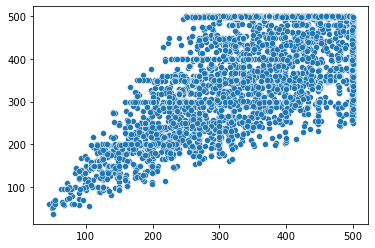

In [47]:
sns.scatterplot(x,y)

In [52]:
np.mean(x)

360.4836885602436

In [53]:
np.mean(y)

404.24619399739015

In [92]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [55]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [56]:
#use ImageDataGenerator to manipulate the images

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               #rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

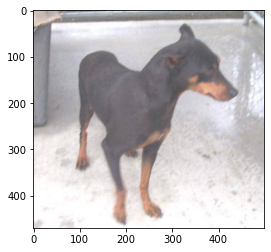

In [95]:
plt.imshow(dog_0)

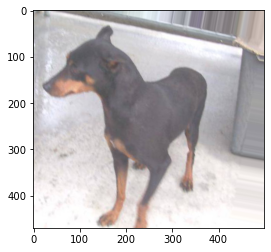

In [96]:
plt.imshow(image_gen.random_transform(dog_0))

In [61]:
#show transfromed version of dog image

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [62]:
#image_gen.flow_from_directory(val_path)

In [63]:
#test_path = my_data_dir+'/test/'
#train_path = my_data_dir+'/train/'
#validation_path = my_data_dir+'/validation/'

In [97]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [98]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


# Creating the Model

In [66]:
#create your CNN model here

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [100]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Early Stopping

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
#early_stop = 

In [103]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [73]:
#batch_size = 

In [74]:
#use image_gen from above and read iamges from train and test set

In [75]:
#train_image_gen = 

In [104]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 17526 images belonging to 2 classes.


In [77]:
#val_image_gen = 

In [105]:
val_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2290 images belonging to 2 classes.


In [83]:
#show class indices in train set

In [106]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#results = #fit your model using train and validation set

Epoch 1/10
1096/1096 [==============================] - 355s 323ms/step - loss: 0.6045 - accuracy: 0.7126 - val_loss: 0.7166 - val_accuracy: 0.5341
Epoch 2/10
1096/1096 [==============================] - 275s 250ms/step - loss: 0.5650 - accuracy: 0.7208 - val_loss: 0.6426 - val_accuracy: 0.6179
Epoch 3/10
1096/1096 [==============================] - 270s 246ms/step - loss: 0.5106 - accuracy: 0.7531 - val_loss: 0.7077 - val_accuracy: 0.6354
Epoch 4/10
1096/1096 [==============================] - 268s 245ms/step - loss: 0.4827 - accuracy: 0.7733 - val_loss: 0.5705 - val_accuracy: 0.7022
Epoch 5/10
1096/1096 [==============================] - 272s 248ms/step - loss: 0.4562 - accuracy: 0.7911 - val_loss: 0.5862 - val_accuracy: 0.6974
Epoch 6/10
1096/1096 [==============================] - 265s 242ms/step - loss: 0.4299 - accuracy: 0.8053 - val_loss: 0.4747 - val_accuracy: 0.7764
Epoch 7/10
1096/1096 [==============================] - 634s 579ms/step - loss: 0.4166 - accuracy: 0.8145 - val_

In [108]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=val_image_gen, callbacks=[early_stop])

Epoch 1/10
1096/1096 [==============================] - 946s 861ms/step - loss: 0.7122 - accuracy: 0.7092 - val_loss: 0.7498 - val_accuracy: 0.5323
Epoch 2/10
1096/1096 [==============================] - 707s 645ms/step - loss: 0.6009 - accuracy: 0.7132 - val_loss: 0.7559 - val_accuracy: 0.5323
Epoch 3/10
1096/1096 [==============================] - 615s 561ms/step - loss: 0.5997 - accuracy: 0.7132 - val_loss: 0.7601 - val_accuracy: 0.5323
Epoch 4/10
1096/1096 [==============================] - 600s 548ms/step - loss: 0.6004 - accuracy: 0.7132 - val_loss: 0.7590 - val_accuracy: 0.5323
Epoch 5/10
1096/1096 [==============================] - 612s 558ms/step - loss: 0.6017 - accuracy: 0.7132 - val_loss: 0.7690 - val_accuracy: 0.5323
Epoch 6/10
1096/1096 [==============================] - 609s 556ms/step - loss: 0.6014 - accuracy: 0.7129 - val_loss: 0.7600 - val_accuracy: 0.5323


# Evaluating the Model

In [ ]:
losses = pd.DataFrame(......)

In [110]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.712158,0.709232,0.749774,0.532314
1,0.600870,0.713169,0.755912,0.532314
2,0.599702,0.713226,0.760090,0.532314
3,0.600419,0.713169,0.758994,0.532314
4,0.601660,0.713226,0.768979,0.532314


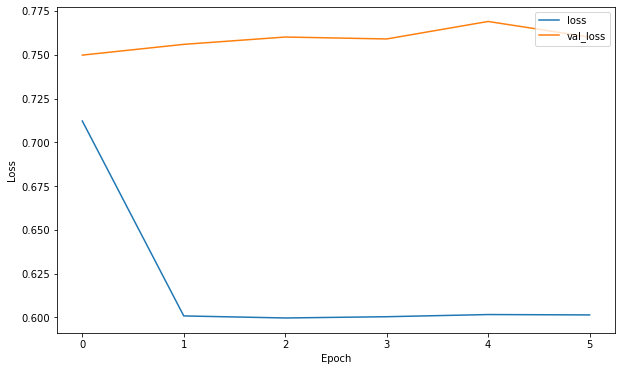

In [112]:
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

<AxesSubplot:>

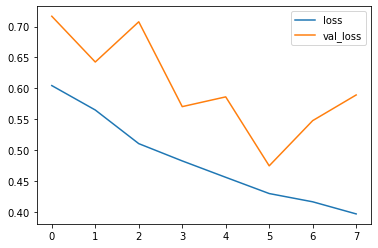

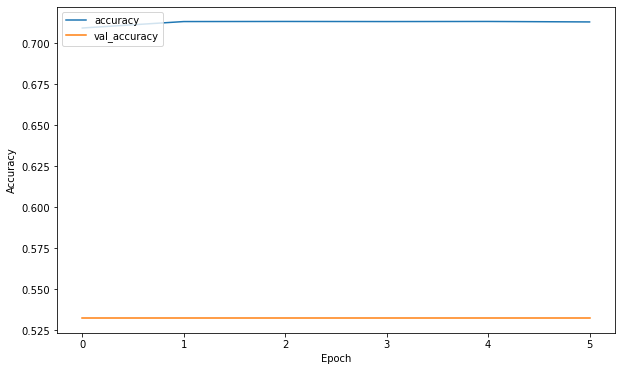

In [113]:
plt.figure(figsize=(10,6))
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [114]:
model.metrics_names

['loss', 'accuracy']

['loss', 'accuracy']

In [116]:
model.evaluate_generator(val_image_gen)

[0.7600348591804504, 0.5323144197463989]

[0.5973725318908691, 0.7532750964164734]

In [117]:
from tensorflow.keras.preprocessing import image

In [119]:
pred_probabilities = model.predict_generator(val_image_gen)

In [ ]:
pred_probabilities = 

In [120]:
pred_probabilities

array([[0.29139522],
       [0.29139522],
       [0.29139522],
       ...,
       [0.29139522],
       [0.29139522],
       [0.29139522]], dtype=float32)

In [ ]:
pred_probabilities

array([[0.044494  ],
       [0.04975203],
       [0.14317203],
       ...,
       [0.97140694],
       [0.8137139 ],
       [0.8951267 ]], dtype=float32)

In [122]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

In [123]:
predictions = pred_probabilities > 0.5

In [124]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1219
           1       0.00      0.00      0.00      1071

    accuracy                           0.53      2290
   macro avg       0.27      0.50      0.35      2290
weighted avg       0.28      0.53      0.37      2290



              precision    recall  f1-score   support

           0       0.69      0.94      0.80      1219
           1       0.89      0.52      0.66      1071

    accuracy                           0.75      2290
   macro avg       0.79      0.73      0.73      2290
weighted avg       0.78      0.75      0.73      2290



In [128]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1219,    0],
       [1071,    0]], dtype=int64)

array([[1149,   70],
       [ 509,  562]], dtype=int64)

In [129]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [135]:
from PIL import Image

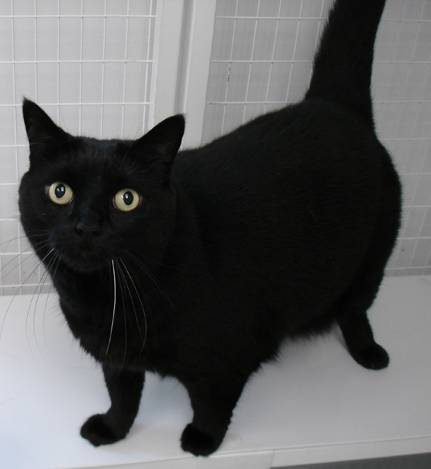

In [ ]:
#read 2749.jpg from test set

In [151]:
img_cat = Image.open("C:/Users/MT/Desktop/2- DL/Proje_Ödev/CNN_Proje/data/2749.jpg")

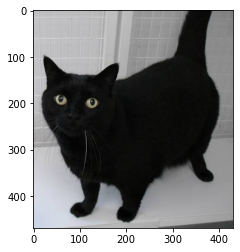

In [155]:
plt.imshow(img_cat)

In [175]:
os.listdir(train_path+'cat')[2]

'cat.10.jpg'

In [180]:
kara = train_path+'cat'+'/cat.10.jpg'

In [181]:
imread(kara)

array([[[ 26,  30,  39],
        [ 24,  28,  37],
        [ 19,  23,  32],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [125, 157, 154]],

       [[ 29,  33,  42],
        [ 29,  33,  42],
        [ 26,  30,  39],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [124, 156, 153]],

       [[ 30,  34,  43],
        [ 34,  38,  47],
        [ 35,  39,  48],
        ...,
        [127, 159, 156],
        [126, 158, 155],
        [124, 156, 153]],

       ...,

       [[165, 151, 116],
        [163, 149, 114],
        [156, 142, 105],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[160, 146, 111],
        [159, 145, 110],
        [153, 139, 102],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[154, 140, 105],
        [154, 140, 105],
        [150, 136,  99],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]]

In [185]:
kara = imread(kara)

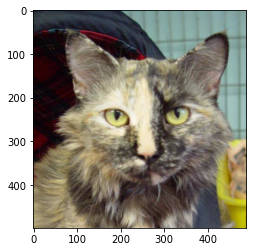

In [187]:
plt.imshow(kara)

In [188]:
kara.shape

(499, 489, 3)

In [191]:
my_image = image.load_img(train_path+'cat'+'/cat.10.jpg',target_size=image_shape)

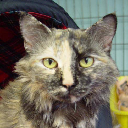

In [192]:
my_image

In [193]:
type(my_image)

PIL.Image.Image

In [194]:
my_image = image.img_to_array(my_image)

In [195]:
type(my_image)

numpy.ndarray

In [196]:
my_image.shape

(128, 128, 3)

In [197]:
my_image = np.expand_dims(my_image, axis=0)

In [198]:
my_image.shape

(1, 128, 128, 3)

In [199]:
model.predict(my_image)

array([[0.29139525]], dtype=float32)

In [200]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [202]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [166]:
# resize it as 128 * 128

In [ ]:
# turn the image into numpy array

(128, 128, 3)

In [ ]:
#reshape it as below

(1, 128, 128, 3)

In [ ]:
#predict the image class with your model

array([[0.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
test_image_gen.class_indices

{'cat': 0, 'dog': 1}